In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
# from skopt.space import Integer
# from skopt.space import Real
# from skopt.space import Categorical
# from skopt import BayesSearchCV
import pickle
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras_tuner import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler

In [25]:
import os
os.listdir('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\code\\after_validation\\hyperparameter_tuning\\neuronal_network\\v1\\logs')

['phishing_tuning_v1']

In [2]:
pd.read_csv('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\training_data\\variance_cleanup_features_corrected\\variance_cleanup_selected_features_corrected.csv')

,url,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
0,https://www.paducahbank.com/Learn/Whats-Happen...,0,1,0,87,2,0,3,7,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
1,https://whatis.techtarget.com/definition/input...,0,1,0,57,2,0,3,4,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
2,https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
3,https://gb.123rf.com/footage_121810088_online-...,0,1,21,159,3,2,15,3,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
4,https://www.what-song.com/Movies/Soundtrack/16...,0,1,4,68,2,0,4,6,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,http://smbc-wy.com,1,0,0,18,1,0,1,2,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
19996,http://seuspontosnatalinosincluaseuspontoshoje...,1,0,7,186,2,0,1,9,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
19997,https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
19998,http://xarconentertainment.sexxyfemaledolls.co...,1,0,23,94,3,0,0,5,0,...,1.0,0.0,0,0,0,1,0,0,0,0.0


In [3]:
cleaned_df=pd.read_csv('c:\\Users\\patri\\Documents\\FH_Technikum\\CS\\Master\\MA_ML_Phishing\\MA_ML_Phishing\\Prototype\\training_data\\variance_cleanup_features_corrected\\variance_cleanup_selected_features_corrected.csv')
cleaned_df.set_index('url',inplace=True)

In [6]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [8]:
os.listdir('../../../../hyperparameter_tuning/neuronal_network/v1/')

['logs',
 'neuronal_network_hyperparameter_tuning_v1.ipynb',
 'neuronal_network_scaler_v1.pkl',
 'neuronal_network_selected_test_features_v1.csv',
 'neuronal_network_selected_test_label_v1.csv',
 'neuronal_network_selected_train_features_v1.csv',
 'neuronal_network_selected_train_label_v1.csv',
 'neuronal_network_selectkbest_v1.pkl']

In [4]:
selected_features=pd.read_csv('../../../../hyperparameter_tuning/neuronal_network/v1/neuronal_network_selected_train_features_v1.csv')
selected_features.set_index('url',inplace=True)

In [5]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [6]:
features=features[selected_features.columns]

In [7]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_normalized = scaler.transform(X_train)
# X_test_normalized = scaler.transform(X_test)

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_normalized_selected = scaler.transform(X_train_selected)
X_test_normalized_selected = scaler.transform(X_test_selected)

In [9]:
X_train_normalized_selected

array([[1.        , 0.00127796, 0.01494396, ..., 0.        , 0.4       ,
        1.        ],
       [1.        , 0.00127796, 0.01058531, ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.00638978, 0.01867995, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.00933998, ..., 0.        , 0.5       ,
        1.        ],
       [1.        , 0.        , 0.02179328, ..., 0.        , 0.2       ,
        1.        ],
       [1.        , 0.        , 0.05977584, ..., 0.        , 0.1       ,
        0.        ]])

In [66]:
model_before = keras.Sequential()
model_before.add(layers.Flatten(input_dim=50))
model_before.add(layers.Dense(16, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))

In [67]:
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history=model_before.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8769 - val_loss: 0.2073 - val_accuracy: 0.9213
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9323 - val_loss: 0.1658 - val_accuracy: 0.9403
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1595 - accuracy: 0.9429 - val_loss: 0.1477 - val_accuracy: 0.9518
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1473 - accuracy: 0.9465 - val_loss: 0.1371 - val_accuracy: 0.9548
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1396 - accuracy: 0.9488 - val_loss: 0.1303 - val_accuracy: 0.9565
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1339 - accuracy: 0.9518 - val_loss: 0.1255 - val_accuracy: 0.9565
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1299 - accuracy: 0.9521 - val_loss: 0.1216 - val_accuracy: 0.9573

In [69]:
y_pred = model_before.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 683us/step


In [81]:
os.listdir('../../../../../images/after_validation/neuronal_network')

[]

Accuracy: 0.972
Recall: 0.9775393898759638


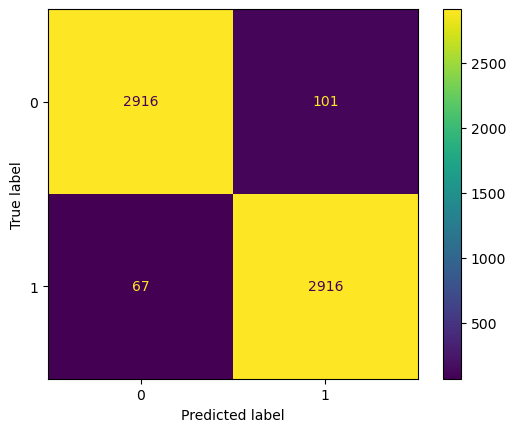

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../../images/after_validation/neuronal_network/neuronal_network_confusion_matrix_before_tuning_v1',dpi=300, bbox_inches = "tight")

In [25]:
model_before.save('../../../saved_models/neuronal_network/neuronal_network_before_v1.keras')

In [10]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_dim=50))
    
    # Tune the number of units in the first dense layer
    # Choose an optimal value between 32-512
    hp_units1 = hp.Int('units1', min_value=16, max_value=512, step=16)
    model.add(layers.Dense(units=hp_units1, activation='relu'))
    hp_units2 = hp.Int('units2', min_value=16, max_value=512, step=16)
    model.add(layers.Dense(units=hp_units2, activation='relu'))
    
    # Tune the number of units in the second dense layer
    # Choose an optimal value between 32-512
    # hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    # model.add(layers.Dense(units=hp_units2, activation='relu'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [11]:
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=4,
    directory='logs',
    project_name='phishing_tuning_v1')

Reloading Tuner from logs\phishing_tuning_v1\tuner0.json


In [12]:
tuner.results_summary()

Results summary
Results in logs\phishing_tuning_v1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 18 summary
Hyperparameters:
units1: 512
units2: 16
learning_rate: 0.0001
Score: 0.9763333350419998

Trial 14 summary
Hyperparameters:
units1: 512
units2: 16
learning_rate: 0.0001
Score: 0.9763333201408386

Trial 15 summary
Hyperparameters:
units1: 512
units2: 16
learning_rate: 0.001
Score: 0.9761249870061874

Trial 06 summary
Hyperparameters:
units1: 176
units2: 80
learning_rate: 0.0001
Score: 0.9759166687726974

Trial 02 summary
Hyperparameters:
units1: 432
units2: 112
learning_rate: 0.0001
Score: 0.9758750051259995

Trial 11 summary
Hyperparameters:
units1: 304
units2: 160
learning_rate: 0.0001
Score: 0.9758333265781403

Trial 16 summary
Hyperparameters:
units1: 512
units2: 160
learning_rate: 0.001
Score: 0.9757916629314423

Trial 08 summary
Hyperparameters:
units1: 240
units2: 304
learning_rate: 0.0001
Score: 0.9757916629314423

Trial 12 summary
Hyperparam

In [32]:
tuner.search(X_train_normalized_selected,y_train, epochs=100, validation_data=(X_test_normalized_selected, y_test))

Trial 20 Complete [00h 04m 01s]
val_accuracy: 0.976666659116745

Best val_accuracy So Far: 0.976666659116745
Total elapsed time: 01h 32m 29s


In [13]:
tuner.results_summary(1)

Results summary
Results in logs\phishing_tuning_v1
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 18 summary
Hyperparameters:
units1: 512
units2: 16
learning_rate: 0.0001
Score: 0.9763333350419998


In [14]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 dense_1 (Dense)             (None, 16)                8208      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 34337 (134.13 KB)
Trainable params: 34337 (134.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history=model.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9808 - val_loss: 0.0836 - val_accuracy: 0.9740
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0576 - accuracy: 0.9808 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.0822 - val_accuracy: 0.9755
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0813 - val_accuracy: 0.9758
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0858 - val_accuracy: 0.9727
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0551 - accuracy: 0.9819 - val_loss: 0.0824 - val_accuracy: 0.9748

In [16]:
y_pred = model.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 679us/step


Accuracy: 0.9731666666666666
Recall: 0.9775393898759638


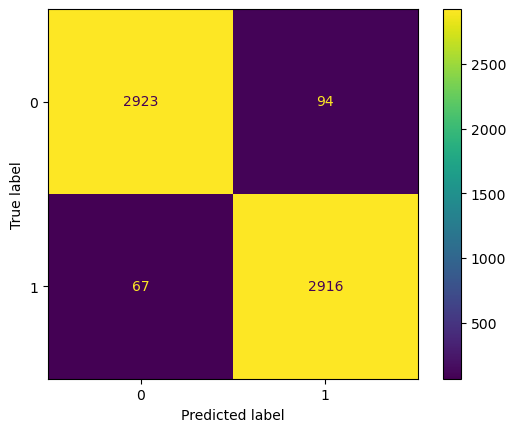

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../../images/after_validation/neuronal_network/test',dpi=300, bbox_inches = "tight")

In [19]:
model.save('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [40]:
X_train_selected_test=pd.read_csv('neuronal_network_selected_train_features_v1.csv')

In [43]:
X_test_selected_test=pd.read_csv('neuronal_network_selected_test_features_v1.csv')

In [44]:
X_train_selected_test.set_index('url',inplace=True)
X_test_selected_test.set_index('url',inplace=True)

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected_test)
X_train_normalized_selected_test = scaler.transform(X_train_selected_test)
X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [47]:
model_test = keras.models.load_model('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [48]:
model_test

In [49]:
y_pred_test = model_test.predict(X_test_normalized_selected_test)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

188/188 [==============================] - 0s 663us/step


Accuracy: 0.9723333333333334
Recall: 0.9772041568890378


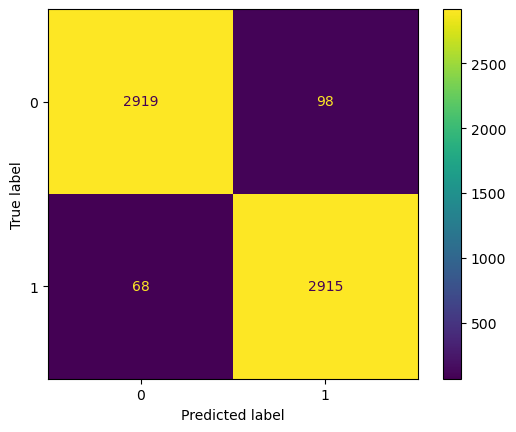

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
conf_mat = confusion_matrix(y_test,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()